<a href="https://colab.research.google.com/github/suryakanthPS/DS_Mini-Projects/blob/main/As7_Q2_Clustering_Crime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [ ]:
#import data
data = pd.read_csv("/content/crime_data.csv")
data

## EDA

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [ ]:
data1=data.drop(['Unnamed: 0'],axis=1)
data1

In [ ]:
#Normalize heterogenous numerical data using standard scaler
data_norm = StandardScaler().fit_transform(data1)
data_norm

## **DBSCAN clustering**

In [ ]:
dbscan = DBSCAN(eps=1,min_samples=4)
dbscan.fit(data_norm)

DBSCAN(eps=1, min_samples=4)

In [ ]:
dbscan.labels_

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,
        0,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0, -1,  1,  1,  1,  1,  1,  1,  1])

In [ ]:
#Adding clusters to the dataset
data1['clusters'] = dbscan.labels_
data1

In [ ]:
data1.groupby('clusters').agg(['mean'])

,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
clusters,,,,
-1,11.005556,247.166667,70.666667,28.766667
0,14.050000,238.000000,57.750000,23.200000
1,4.825000,112.035714,63.357143,16.107143


In [ ]:
data1.groupby('clusters').agg(['mean']).reset_index()

,clusters,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,-1,11.005556,247.166667,70.666667,28.766667
1,0,14.050000,238.000000,57.750000,23.200000
2,1,4.825000,112.035714,63.357143,16.107143


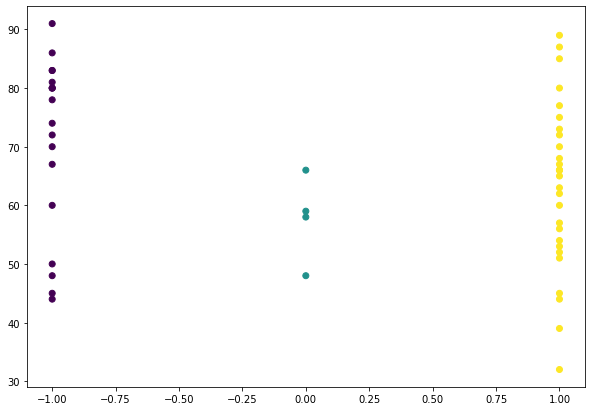

In [ ]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(data1['clusters'],data1['UrbanPop'], c=dbscan.labels_) 